In [ ]:
from transformers import BertConfig, BertModel, BertTokenizer
import pandas as pd
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

from flair.embeddings import BertEmbeddings
from flair.data import Sentence

In [ ]:
model_path = "../models/munliv/best_model"
tokeniser_path = "../models/munliv/best_model/tokenizer_config"
data_file_path = "../data/preprocessed-without_tokenisation/2019_10_20_16_06.tsv"

Load data

In [ ]:
colnames = ['Id', 'Time', 'Text', 'Hashtag', 'Location']
train = pd.read_csv(data_file_path, sep='\t', names=colnames, header=None)
print(train['Text'].head())


0    Mourinho: "I’m going to try and get a job like...
1    In the thick of it 💪 13 minutes played at Old ...
2    In fairness, Utd are working hard in this game...
3    This could ultimately be @LFC ‘s undoing and @...
4    This team that is playing against Man U, is it...
Name: Text, dtype: object
Mourinho: "I’m going to try and get a job like Ole has, and speak all the time about the future. I think it’s a great situation, three year contract – the future, the young players. I think it’s a great job to do in such a giant club.” mufc [Sky]


BERT- Extract word embeddings

In [ ]:
def load_model_flair(model_path): 
  model = BertEmbeddings(bert_model_or_path=model_path)
  return model

def get_embeddings_flair(text, model):
    embeddings = []
    words = []
    sentence = Sentence(text)
    model.embed(sentence)
    for token in sentence:
        words.append(token.text)
        embeddings.append(token.embedding.numpy())
    return embeddings, words

# method to get 2-dimensional token embeddings correspond to list of sentences
def get_bulk_embeddings_flair(text_list, model, cased=False):
  embeddings = []
  tokens = []

  for row in range(len(text_list)):
    if cased:
      temp_embeddings, temp_tokens = get_embeddings_flair(text_list[row], model)
    else:
      temp_embeddings, temp_tokens = get_embeddings_flair(text_list[row].lower(), model)

    embeddings.extend(temp_embeddings)
    tokens.extend(temp_tokens)

  embeddings = np.array(embeddings)
  tokens = np.array(tokens)

  tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
              learning_rate = 1000, n_iter = 1500)
  embeddings = tsne.fit_transform(embeddings)
  return embeddings, tokens

t-SNE visualisation methods

In [ ]:
def tsne_plot_words(title, embeddings, words, a, filename=None):
  plt.figure(figsize=(16, 9))
  x = embeddings[:, 0]
  y = embeddings[:, 1]
  plt.scatter(x, y, alpha=a)
  for i, word in enumerate(words):
    plt.annotate(word, alpha=0.5, xy=(embeddings[i][0], embeddings[i][1]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
  plt.title(title)
  plt.grid(True)
  if filename:
    plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')
  plt.show()

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    # colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    colors = ['red', 'blue']
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')
    plt.show()

Data filtering methods

In [ ]:
# filter text which contain given word
def filter_by_word(data, word):
  filtered_data = []
  for text in data:
    splits = (text.lower()).split()
    if word in splits:
      filtered_data.append(text)
  return filtered_data

def get_unique(data):
  return list(set(data))


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128074 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  font.

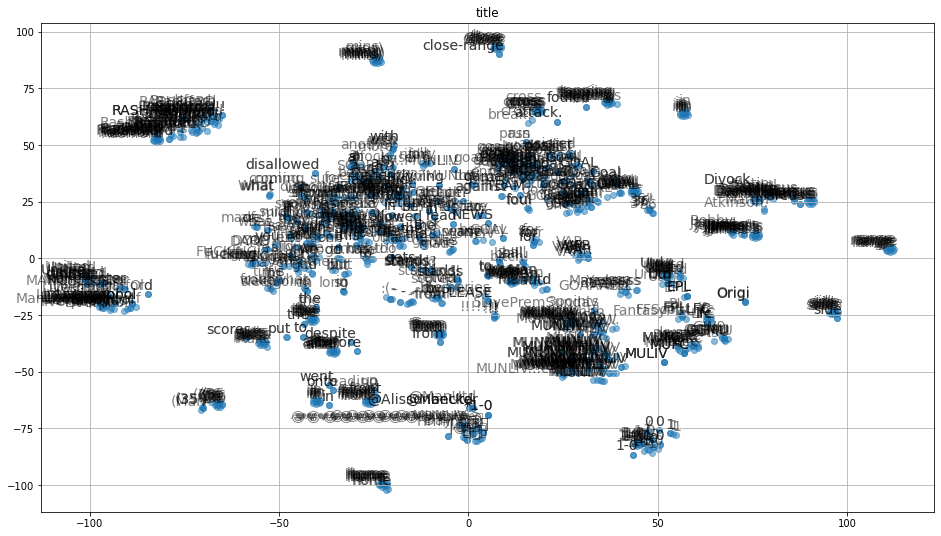

In [ ]:
# Word representations - filtered text with 'goal'

# load model
model = load_model_flair(model_path)

filtered_data = filter_by_word(train['Text'], 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data, model)

tsne_plot_words("title", embeddings, tokens, a=0.5)

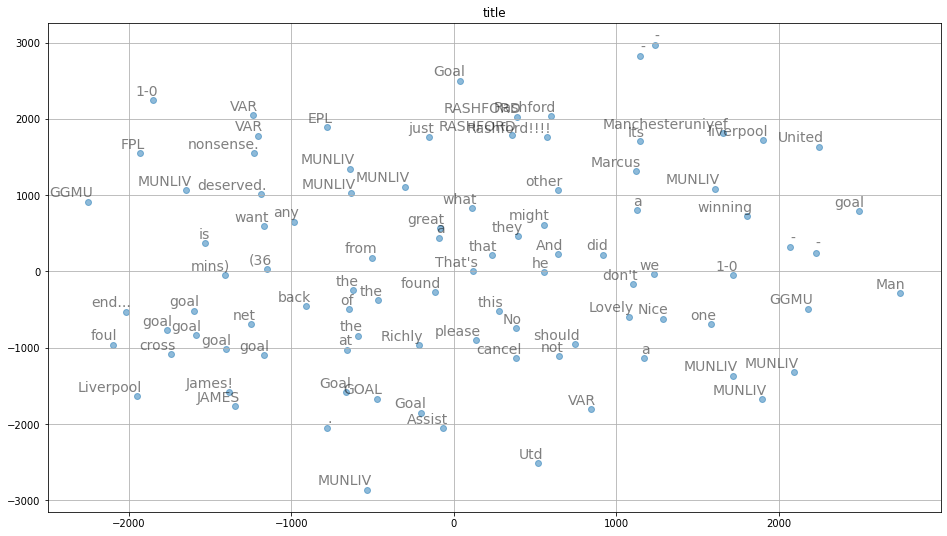

In [ ]:
# Word representations - unique filtered text with 'goal'

# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data[:10], model)

tsne_plot_words("title", embeddings, tokens, a=0.5)

98


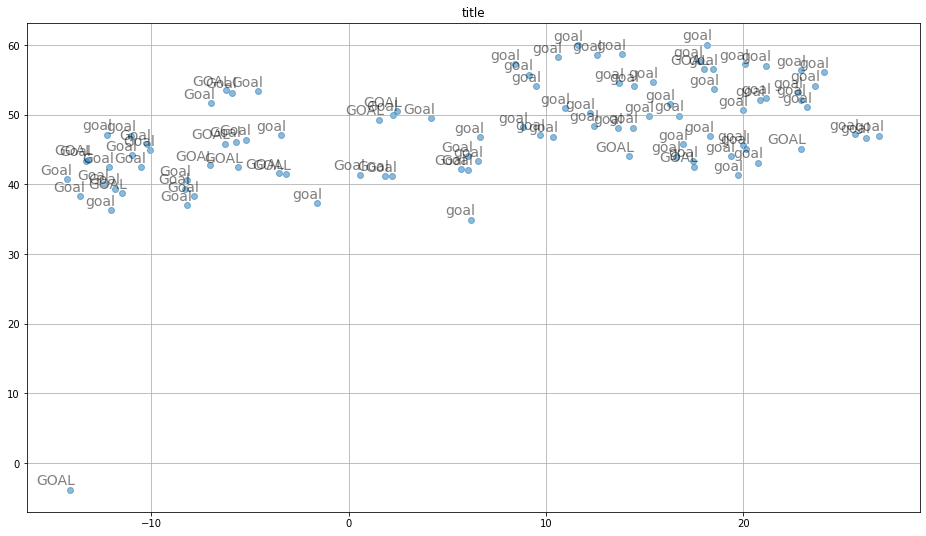

In [ ]:
# Word 'goal' representations - unique filtered text with 'goal'

# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data, model)

filtered_embeddings = []
filtered_tokens = []
# remove other tokens
for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' == token.lower():
    filtered_embeddings.append(embedding)
    filtered_tokens.append(token)

filtered_embeddings = np.array(filtered_embeddings)
filtered_tokens = np.array(filtered_tokens)
print(len(filtered_tokens))

tsne_plot_words("title", filtered_embeddings, filtered_tokens, a=0.5)

['Issa Goal MUNLIV', 'No goal for sure. VAR will rob it. MUFC', 'Good goal Rashford. MUNLIV', 'PLEASE GOAL PLEASE MUNLIV', '1 more goal and we are good to go. 1- 0 MUNLIV', 'Goal MU. Congrats YNWA', 'Match Day⚽️🔴 lfc 3points goal memories', 'And he just did found the back of the net goal GGMU MUNLIV', 'GOAL RASHFORD!! GGMU', 'Rashford with another manu goal of the month????MUNLIV', 'This goal has to stand... MUNLIV', 'Goal bitch! Mufc', 'Quality goal but surely thats over-turned MUNLIV', 'VAR should not cancel this goal MUNLIV', 'Lovely goal - might they VAR that foul at the other end... Richly deserved. MUNLIV', 'VAR review Goal stands Man Utd 1-0 Liverpool MUNLIV', 'Awesome goal by rashford but even better assist by the Daniel James !!! manutd mufc @ManUtd MUNLIV', 'It’s a goal ooooooo MUNLIV', 'Goal Rashford, get in!!!! MUNLIV', 'Goal ☃️ ☃️MUNLIV', 'United now leading by a goal from Rashford.. It was coming and it did. Brilliant goal.MUNLIV', 'Yeees rashford you beauty fantastic att

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0, flags=flags)


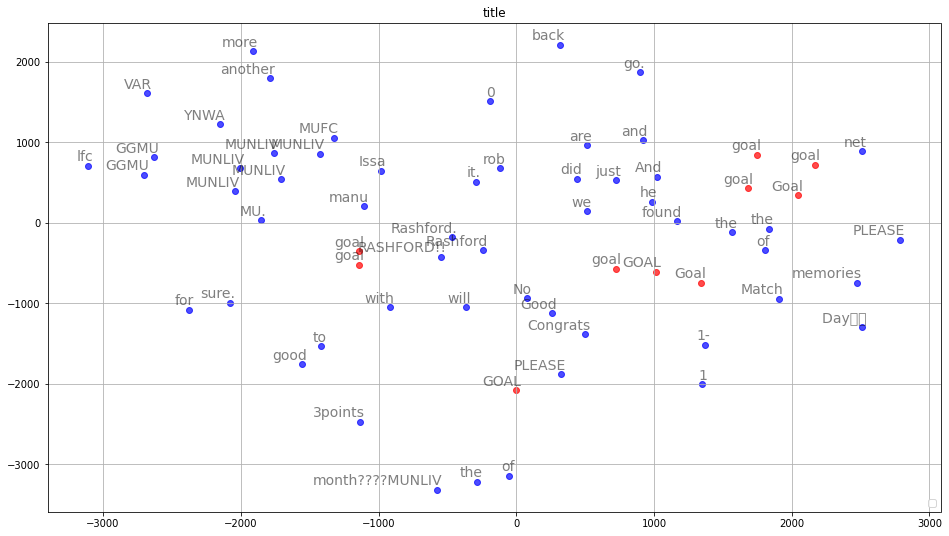

In [ ]:
import random

# # load model
model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data)
print(filtered_data)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data[:10], model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="/content/drive/MyDrive/Colab Notebooks/BERT-visualisations/figure.png")



["Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", 'Issa Goal MUNLIV', 'No foul that - gotta be a goal MUNLIV', 'Awesome goal by rashford but even better assist by the Daniel James !!! manutd mufc @ManUtd MUNLIV', 'VAR should call that goal back MUNLIV', 'It’s a goal ooooooo MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", 'That was our goal Firmino😭 MUNLIV', 'Goal Rashford MUNLIV', 'This goal has to stand... MUNLIV', 'Goal MUNLIV', 'Rah great goal utd MUNLIV', 'A goal against Liverpool is when Old Trafford nuts.MUNLIV', "A goal on counter attack? Did I really see this? I think it's time for me to wake up from sleep MUNLIV", 'Goal . United 1-0 liverpool GGMU', '36” Goal Rashford VAR Check MUNLIV', "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live commentary 👇 📲⚽️:  5LivePremSunday MUNLIV", 'terrible, terrible go

No handles with labels found to put in legend.


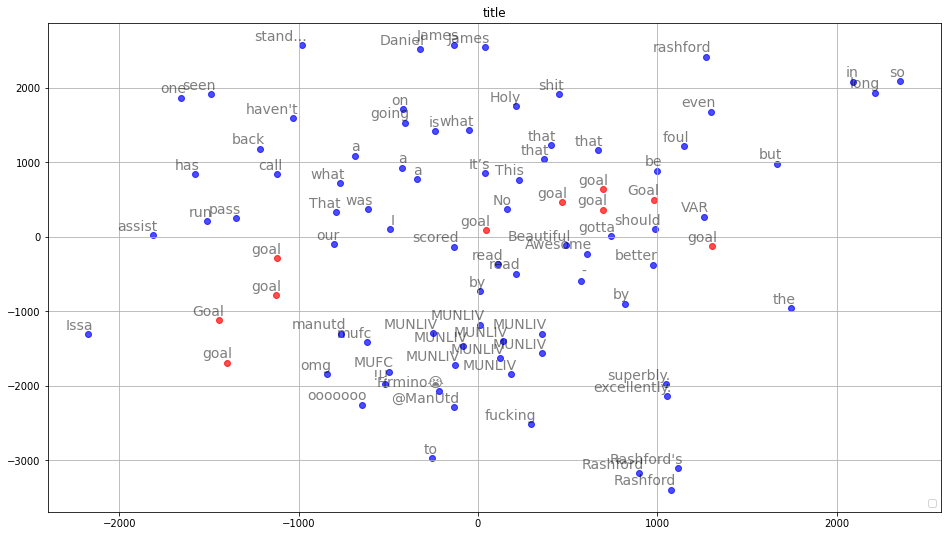

In [ ]:
import random

# # load model
model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data)
print(filtered_data)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data[:10], model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="/content/drive/MyDrive/Colab Notebooks/BERT-visualisations/figure1.png")


['Liverpool playing too much!!!! Fuck around and get a goal against MUNLIV', 'Marcussss but that goal has to be disallowed :( MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'Rashford with a shock goal 1-0 United MUNLIV', 'Rashford has a goal in this game! MUNLIV', '36” Goal Rashford VAR Check MUNLIV', 'VAR review Goal stands Man Utd 1-0 Liverpool MUNLIV', 'Goal stands!!! Man Untd GGMU', '⚽️ GOAL! Rashford (Man Utd) Will the goal stand? VAR . . . ManUtd 1 Liverpool 0', 'What a break! Well-deserved goal if the decision stays. MUNLIV']


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0, flags=flags)


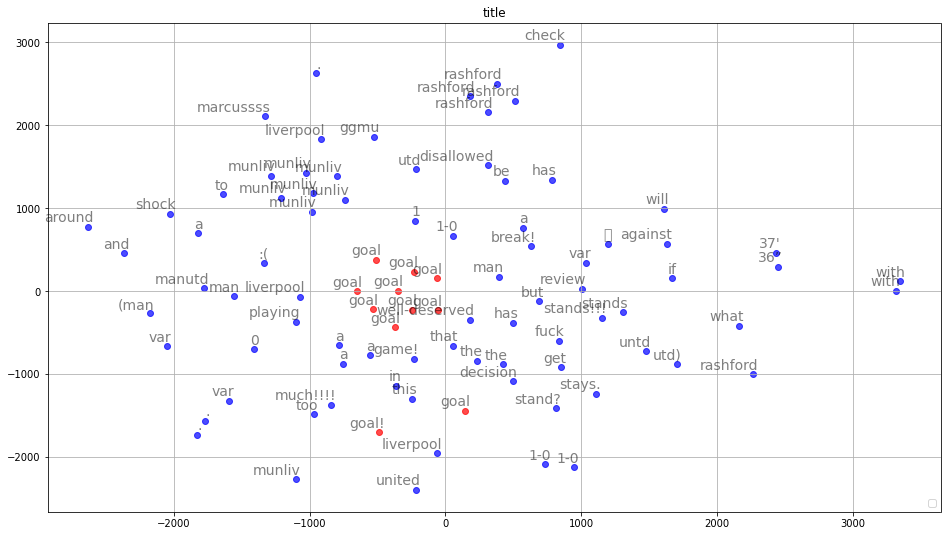

In [ ]:
import random

# temp = ['Issa Goal MUNLIV', 'No goal for sure. VAR will rob it. MUFC', 'Good goal Rashford. MUNLIV', 'PLEASE GOAL PLEASE MUNLIV', '1 more goal and we are good to go. 1- 0 MUNLIV', 'Goal MU. Congrats YNWA', 'Match Day⚽️🔴 lfc 3points goal memories', 'And he just did found the back of the net goal GGMU MUNLIV', 'GOAL RASHFORD!! GGMU', 'Rashford with another manu goal of the month????MUNLIV', 'This goal has to stand... MUNLIV', 'Goal bitch! Mufc', 'Quality goal but surely thats over-turned MUNLIV', 'VAR should not cancel this goal MUNLIV', 'Lovely goal - might they VAR that foul at the other end... Richly deserved. MUNLIV', 'VAR review Goal stands Man Utd 1-0 Liverpool MUNLIV', 'Awesome goal by rashford but even better assist by the Daniel James !!! manutd mufc @ManUtd MUNLIV', 'It’s a goal ooooooo MUNLIV', 'Goal Rashford, get in!!!! MUNLIV', 'Goal ☃️ ☃️MUNLIV', 'United now leading by a goal from Rashford.. It was coming and it did. Brilliant goal.MUNLIV', 'Yeees rashford you beauty fantastic attack fantastic goal MUNLIV', '36” Goal Rashford VAR Check MUNLIV', "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live commentary 👇 📲⚽️:  5LivePremSunday MUNLIV", 'A goal against Liverpool is when Old Trafford nuts.MUNLIV', 'Goal Rashford MUNLIV', 'MUNLIV...can we celebrate the goal yet?', 'GOAL RASHFORD MUNLIV', 'Twice now. Bobby needs a goal soon. LFC', 'Goal . United 1-0 liverpool GGMU', 'Rah great goal utd MUNLIV', 'No foul that - gotta be a goal MUNLIV', 'Marcussss but that goal has to be disallowed :( MUNLIV', 'Goal Manchesteruniyef is winning MUNLIV Rashford', 'Rashford!!!! Man Utd up 1-0 , if the goal stands MUFC MUNLIV', 'Goal stands!!! Man Untd GGMU', 'goal given lfc', 'GOAL 😂😂😂😂😂😂😂😂😂😂😂 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ GGMU', 'VAR should call that goal back MUNLIV', 'GOAL GOAL GOAAALLL RASHY 1 MUFC', 'Rashford has a goal in this game! MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'Goal ball MUNLIV', "That's a great goal - what a cross from James! MUNLIV", "It's a goal for Manchester United MUNLIV", 'I saw that goal for United coming. And they said this game would be easy for Liverpool? Laugh with me! 😂 MUNLIV', 'Goal Rashford Man United 1 / 0 Liverpool MUNLIV', 'Fantastic goal setup by James for Rashford! MUNLIV', 'No goal please MUNLIV', 'VAR check over, goal stands MUNLIV', 'Fuck me that was a hell of a goal MUNLIV', 'Goal Ball. MUNLIV', 'Should be no goal MUNLIV', 'THAT IS A GOAL MUNLIV', 'terrible, terrible goal to give up. LFC', 'Rashford yesssss goal mufc munliv ggmu skysports', 'if this goal stands i sweat to god MUNLIV', 'Origi is diving this goal should count MUNLIV', 'Liverpool playing too much!!!! Fuck around and get a goal against MUNLIV', "A goal on counter attack? Did I really see this? I think it's time for me to wake up from sleep MUNLIV", "And that's how you goal bytchhhh MUNLIV", 'Rashiiii Goal !!!!!!! MUNLIV', 'Goal ball.. rashford MUNLIV', 'Rashford goal mufc', 'Goal by Rashford, assisted by Martin Atkinson. MUNLIV', 'TEAM NEWS 🆚 @ManUtd @Alissonbecker returns in goal 👊 MUNLIV', 'Man Utd 1 Liverpool 0 36 mins Goal to Utd.... LFC MUNLIV', 'Goal United MUNLIV', 'What a break! Well-deserved goal if the decision stays. MUNLIV', 'Fucking foul and no goal Liverpool', 'Goal ! Rashford !! MUFC', '⚽️ GOAL for MUFC - Marcus Rashford scores from close-range to put the home side 1-0 in front despite Divock Origi be fouled before United went onto the attack. VAR allowed the goal MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", 'MANCHESTER UNITED SCORED A GOAL GET IN...MUNLIV', "36' Goal Rashford 1-0 MUFC", 'That was our goal Firmino😭 MUNLIV', 'Goal 😂😂😂😂😂MUNLIV', "GOAL Man Utd *1-0 Liverpool RASHFORD (35')  MULIV MUFC lfc EPL", 'Should of been a free not a goal !! 👊 MUNLIV', "Nice one Marcus Rashford!!!! Its a goal we don't want any VAR nonsense. MUNLIV EPL", "goal 36' marcus rashford manchester united:1 liverpool:0 MUNLIV", 'Goal to United. 1-0 munliv', 'Goal stands. WOW. MUNLIV', "Rashford sent Matip for a right jolly then 😂 if this gets overturned the games gone mad. Let the goal stand and let's see what Liverpool are made of. MunLiv PL", '⚽️ | GOAL - Marcus Rashford 🅰️ | ASSIST - Daniel James 👿 Manchester United 1-0 Liverpool 🔴 FFScout FPL GW9 FantasyPL MUNLIV', 'Goal Rashford!!!! MUNLIV', "Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", 'GOAL to Manchester United 1-0 Rashford with the goal James with the assist MUNLIV FPL', "GOAL Man Utd 1-0 Liverpool (36 mins) Marcus Rashford puts the home side in front after tapping in Daniel James's cross from close range MUNLIV", '⚽️ GOAL! Rashford (Man Utd) Will the goal stand? VAR . . . ManUtd 1 Liverpool 0', 'Goal MUNLIV', 'MUFC DONT YOU FUCKING DARE TAKE THE GOAL AWAY', 'Rashford with a shock goal 1-0 United MUNLIV', 'If this goal gets disallowed for that MUNLIV', 'Goal - RASHFORD Assist - JAMES Man Utd 1-0 Liverpool (36 mins) FPL MUNLIV']


# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data)

filtered_data_subset = filtered_data[:10]
print(filtered_data_subset)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data_subset, model)
# embeddings, tokens = get_bulk_embeddings_flair(temp, model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="/content/drive/MyDrive/Colab Notebooks/BERT-visualisations/figure4.png")


['Goal Rashford MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", "goal 36' marcus rashford manchester united:1 liverpool:0 MUNLIV", 'Rashford has a goal in this game! MUNLIV', 'Goal ! Rashford !! MUFC', 'Goal Manchesteruniyef is winning MUNLIV Rashford', 'Goal MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'VAR check over, goal stands MUNLIV', 'Goal Rashford!!!! MUNLIV']


No handles with labels found to put in legend.


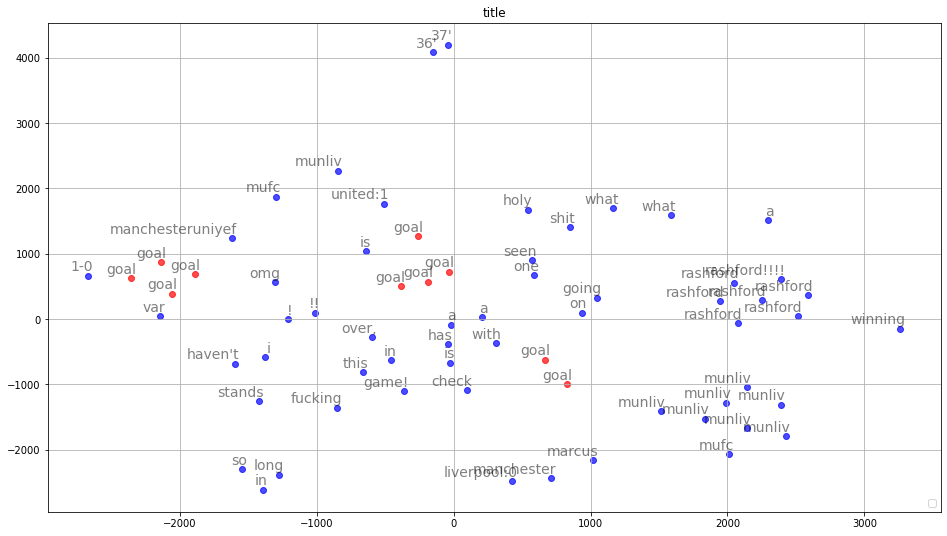

In [ ]:
import random

# temp = ['Issa Goal MUNLIV', 'No goal for sure. VAR will rob it. MUFC', 'Good goal Rashford. MUNLIV', 'PLEASE GOAL PLEASE MUNLIV', '1 more goal and we are good to go. 1- 0 MUNLIV', 'Goal MU. Congrats YNWA', 'Match Day⚽️🔴 lfc 3points goal memories', 'And he just did found the back of the net goal GGMU MUNLIV', 'GOAL RASHFORD!! GGMU', 'Rashford with another manu goal of the month????MUNLIV', 'This goal has to stand... MUNLIV', 'Goal bitch! Mufc', 'Quality goal but surely thats over-turned MUNLIV', 'VAR should not cancel this goal MUNLIV', 'Lovely goal - might they VAR that foul at the other end... Richly deserved. MUNLIV', 'VAR review Goal stands Man Utd 1-0 Liverpool MUNLIV', 'Awesome goal by rashford but even better assist by the Daniel James !!! manutd mufc @ManUtd MUNLIV', 'It’s a goal ooooooo MUNLIV', 'Goal Rashford, get in!!!! MUNLIV', 'Goal ☃️ ☃️MUNLIV', 'United now leading by a goal from Rashford.. It was coming and it did. Brilliant goal.MUNLIV', 'Yeees rashford you beauty fantastic attack fantastic goal MUNLIV', '36” Goal Rashford VAR Check MUNLIV', "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live commentary 👇 📲⚽️:  5LivePremSunday MUNLIV", 'A goal against Liverpool is when Old Trafford nuts.MUNLIV', 'Goal Rashford MUNLIV', 'MUNLIV...can we celebrate the goal yet?', 'GOAL RASHFORD MUNLIV', 'Twice now. Bobby needs a goal soon. LFC', 'Goal . United 1-0 liverpool GGMU', 'Rah great goal utd MUNLIV', 'No foul that - gotta be a goal MUNLIV', 'Marcussss but that goal has to be disallowed :( MUNLIV', 'Goal Manchesteruniyef is winning MUNLIV Rashford', 'Rashford!!!! Man Utd up 1-0 , if the goal stands MUFC MUNLIV', 'Goal stands!!! Man Untd GGMU', 'goal given lfc', 'GOAL 😂😂😂😂😂😂😂😂😂😂😂 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ GGMU', 'VAR should call that goal back MUNLIV', 'GOAL GOAL GOAAALLL RASHY 1 MUFC', 'Rashford has a goal in this game! MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'Goal ball MUNLIV', "That's a great goal - what a cross from James! MUNLIV", "It's a goal for Manchester United MUNLIV", 'I saw that goal for United coming. And they said this game would be easy for Liverpool? Laugh with me! 😂 MUNLIV', 'Goal Rashford Man United 1 / 0 Liverpool MUNLIV', 'Fantastic goal setup by James for Rashford! MUNLIV', 'No goal please MUNLIV', 'VAR check over, goal stands MUNLIV', 'Fuck me that was a hell of a goal MUNLIV', 'Goal Ball. MUNLIV', 'Should be no goal MUNLIV', 'THAT IS A GOAL MUNLIV', 'terrible, terrible goal to give up. LFC', 'Rashford yesssss goal mufc munliv ggmu skysports', 'if this goal stands i sweat to god MUNLIV', 'Origi is diving this goal should count MUNLIV', 'Liverpool playing too much!!!! Fuck around and get a goal against MUNLIV', "A goal on counter attack? Did I really see this? I think it's time for me to wake up from sleep MUNLIV", "And that's how you goal bytchhhh MUNLIV", 'Rashiiii Goal !!!!!!! MUNLIV', 'Goal ball.. rashford MUNLIV', 'Rashford goal mufc', 'Goal by Rashford, assisted by Martin Atkinson. MUNLIV', 'TEAM NEWS 🆚 @ManUtd @Alissonbecker returns in goal 👊 MUNLIV', 'Man Utd 1 Liverpool 0 36 mins Goal to Utd.... LFC MUNLIV', 'Goal United MUNLIV', 'What a break! Well-deserved goal if the decision stays. MUNLIV', 'Fucking foul and no goal Liverpool', 'Goal ! Rashford !! MUFC', '⚽️ GOAL for MUFC - Marcus Rashford scores from close-range to put the home side 1-0 in front despite Divock Origi be fouled before United went onto the attack. VAR allowed the goal MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", 'MANCHESTER UNITED SCORED A GOAL GET IN...MUNLIV', "36' Goal Rashford 1-0 MUFC", 'That was our goal Firmino😭 MUNLIV', 'Goal 😂😂😂😂😂MUNLIV', "GOAL Man Utd *1-0 Liverpool RASHFORD (35')  MULIV MUFC lfc EPL", 'Should of been a free not a goal !! 👊 MUNLIV', "Nice one Marcus Rashford!!!! Its a goal we don't want any VAR nonsense. MUNLIV EPL", "goal 36' marcus rashford manchester united:1 liverpool:0 MUNLIV", 'Goal to United. 1-0 munliv', 'Goal stands. WOW. MUNLIV', "Rashford sent Matip for a right jolly then 😂 if this gets overturned the games gone mad. Let the goal stand and let's see what Liverpool are made of. MunLiv PL", '⚽️ | GOAL - Marcus Rashford 🅰️ | ASSIST - Daniel James 👿 Manchester United 1-0 Liverpool 🔴 FFScout FPL GW9 FantasyPL MUNLIV', 'Goal Rashford!!!! MUNLIV', "Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", 'GOAL to Manchester United 1-0 Rashford with the goal James with the assist MUNLIV FPL', "GOAL Man Utd 1-0 Liverpool (36 mins) Marcus Rashford puts the home side in front after tapping in Daniel James's cross from close range MUNLIV", '⚽️ GOAL! Rashford (Man Utd) Will the goal stand? VAR . . . ManUtd 1 Liverpool 0', 'Goal MUNLIV', 'MUFC DONT YOU FUCKING DARE TAKE THE GOAL AWAY', 'Rashford with a shock goal 1-0 United MUNLIV', 'If this goal gets disallowed for that MUNLIV', 'Goal - RASHFORD Assist - JAMES Man Utd 1-0 Liverpool (36 mins) FPL MUNLIV']


# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data)

filtered_data_subset = filtered_data[:10]
print(filtered_data_subset)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data_subset, model)
# embeddings, tokens = get_bulk_embeddings_flair(temp, model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="/content/drive/MyDrive/Colab Notebooks/BERT-visualisations/figure5.png")


['GOAL 😂😂😂😂😂😂😂😂😂😂😂 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ GGMU', 'Goal United MUNLIV', "Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live commentary 👇 📲⚽️:  5LivePremSunday MUNLIV", 'Twice now. Bobby needs a goal soon. LFC', 'Rashford has a goal in this game! MUNLIV']
['I expected Firmino to bury that one -MUNLIV', "34' How did Firmino not score that? Should have scored! MUN 0 - 0 LIV PL", 'This Firmino dude deserve better flogging MUNLIV', "Looked like Firmino was going for direction, not power. Didn't get it. Getting closer, though. MUNLIV LFC"]
['GOAL 😂😂😂😂😂😂😂😂😂😂😂 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ GGMU', 'Goal United MUNLIV', "Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live 

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128242 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Gl

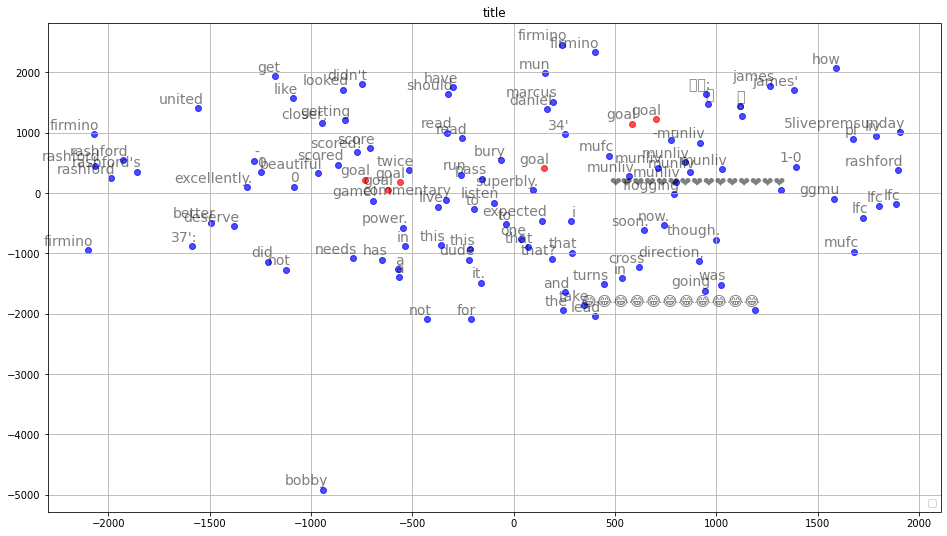

In [ ]:
import random

# temp = ['Issa Goal MUNLIV', 'No goal for sure. VAR will rob it. MUFC', 'Good goal Rashford. MUNLIV', 'PLEASE GOAL PLEASE MUNLIV', '1 more goal and we are good to go. 1- 0 MUNLIV', 'Goal MU. Congrats YNWA', 'Match Day⚽️🔴 lfc 3points goal memories', 'And he just did found the back of the net goal GGMU MUNLIV', 'GOAL RASHFORD!! GGMU', 'Rashford with another manu goal of the month????MUNLIV', 'This goal has to stand... MUNLIV', 'Goal bitch! Mufc', 'Quality goal but surely thats over-turned MUNLIV', 'VAR should not cancel this goal MUNLIV', 'Lovely goal - might they VAR that foul at the other end... Richly deserved. MUNLIV', 'VAR review Goal stands Man Utd 1-0 Liverpool MUNLIV', 'Awesome goal by rashford but even better assist by the Daniel James !!! manutd mufc @ManUtd MUNLIV', 'It’s a goal ooooooo MUNLIV', 'Goal Rashford, get in!!!! MUNLIV', 'Goal ☃️ ☃️MUNLIV', 'United now leading by a goal from Rashford.. It was coming and it did. Brilliant goal.MUNLIV', 'Yeees rashford you beauty fantastic attack fantastic goal MUNLIV', '36” Goal Rashford VAR Check MUNLIV', "GOAL - RASHFORD Marcus Rashford turns in Daniel James' cross and MUFC take the lead 37': 🔴 MUFC 1-0 LFC ⚪️ Listen to live commentary 👇 📲⚽️:  5LivePremSunday MUNLIV", 'A goal against Liverpool is when Old Trafford nuts.MUNLIV', 'Goal Rashford MUNLIV', 'MUNLIV...can we celebrate the goal yet?', 'GOAL RASHFORD MUNLIV', 'Twice now. Bobby needs a goal soon. LFC', 'Goal . United 1-0 liverpool GGMU', 'Rah great goal utd MUNLIV', 'No foul that - gotta be a goal MUNLIV', 'Marcussss but that goal has to be disallowed :( MUNLIV', 'Goal Manchesteruniyef is winning MUNLIV Rashford', 'Rashford!!!! Man Utd up 1-0 , if the goal stands MUFC MUNLIV', 'Goal stands!!! Man Untd GGMU', 'goal given lfc', 'GOAL 😂😂😂😂😂😂😂😂😂😂😂 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ GGMU', 'VAR should call that goal back MUNLIV', 'GOAL GOAL GOAAALLL RASHY 1 MUFC', 'Rashford has a goal in this game! MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'Goal ball MUNLIV', "That's a great goal - what a cross from James! MUNLIV", "It's a goal for Manchester United MUNLIV", 'I saw that goal for United coming. And they said this game would be easy for Liverpool? Laugh with me! 😂 MUNLIV', 'Goal Rashford Man United 1 / 0 Liverpool MUNLIV', 'Fantastic goal setup by James for Rashford! MUNLIV', 'No goal please MUNLIV', 'VAR check over, goal stands MUNLIV', 'Fuck me that was a hell of a goal MUNLIV', 'Goal Ball. MUNLIV', 'Should be no goal MUNLIV', 'THAT IS A GOAL MUNLIV', 'terrible, terrible goal to give up. LFC', 'Rashford yesssss goal mufc munliv ggmu skysports', 'if this goal stands i sweat to god MUNLIV', 'Origi is diving this goal should count MUNLIV', 'Liverpool playing too much!!!! Fuck around and get a goal against MUNLIV', "A goal on counter attack? Did I really see this? I think it's time for me to wake up from sleep MUNLIV", "And that's how you goal bytchhhh MUNLIV", 'Rashiiii Goal !!!!!!! MUNLIV', 'Goal ball.. rashford MUNLIV', 'Rashford goal mufc', 'Goal by Rashford, assisted by Martin Atkinson. MUNLIV', 'TEAM NEWS 🆚 @ManUtd @Alissonbecker returns in goal 👊 MUNLIV', 'Man Utd 1 Liverpool 0 36 mins Goal to Utd.... LFC MUNLIV', 'Goal United MUNLIV', 'What a break! Well-deserved goal if the decision stays. MUNLIV', 'Fucking foul and no goal Liverpool', 'Goal ! Rashford !! MUFC', '⚽️ GOAL for MUFC - Marcus Rashford scores from close-range to put the home side 1-0 in front despite Divock Origi be fouled before United went onto the attack. VAR allowed the goal MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", 'MANCHESTER UNITED SCORED A GOAL GET IN...MUNLIV', "36' Goal Rashford 1-0 MUFC", 'That was our goal Firmino😭 MUNLIV', 'Goal 😂😂😂😂😂MUNLIV', "GOAL Man Utd *1-0 Liverpool RASHFORD (35')  MULIV MUFC lfc EPL", 'Should of been a free not a goal !! 👊 MUNLIV', "Nice one Marcus Rashford!!!! Its a goal we don't want any VAR nonsense. MUNLIV EPL", "goal 36' marcus rashford manchester united:1 liverpool:0 MUNLIV", 'Goal to United. 1-0 munliv', 'Goal stands. WOW. MUNLIV', "Rashford sent Matip for a right jolly then 😂 if this gets overturned the games gone mad. Let the goal stand and let's see what Liverpool are made of. MunLiv PL", '⚽️ | GOAL - Marcus Rashford 🅰️ | ASSIST - Daniel James 👿 Manchester United 1-0 Liverpool 🔴 FFScout FPL GW9 FantasyPL MUNLIV', 'Goal Rashford!!!! MUNLIV', "Rashford read that pass superbly. James read Rashford's run excellently. Beautiful goal scored MUNLIV", 'GOAL to Manchester United 1-0 Rashford with the goal James with the assist MUNLIV FPL', "GOAL Man Utd 1-0 Liverpool (36 mins) Marcus Rashford puts the home side in front after tapping in Daniel James's cross from close range MUNLIV", '⚽️ GOAL! Rashford (Man Utd) Will the goal stand? VAR . . . ManUtd 1 Liverpool 0', 'Goal MUNLIV', 'MUFC DONT YOU FUCKING DARE TAKE THE GOAL AWAY', 'Rashford with a shock goal 1-0 United MUNLIV', 'If this goal gets disallowed for that MUNLIV', 'Goal - RASHFORD Assist - JAMES Man Utd 1-0 Liverpool (36 mins) FPL MUNLIV']


# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])

filtered_data1 = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data1)
filtered_data_subset1 = filtered_data1[:6]
print(filtered_data_subset1)

filtered_data2 = filter_by_word(unique_data, 'firmino')
random.shuffle(filtered_data2)
filtered_data_subset2 = filtered_data2[:4]
print(filtered_data_subset2)

filtered_data_subset = filtered_data_subset1
filtered_data_subset.extend(filtered_data_subset2)
print(filtered_data_subset)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data_subset, model)
# embeddings, tokens = get_bulk_embeddings_flair(temp, model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="/content/drive/MyDrive/Colab Notebooks/BERT-visualisations/figure7.png")
